# Applied Data Science Capstone Project

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction / Business Problem

In a big city where car accidents happen all the time, it can be a challenge to deploy necessary number or type of personnel on time with the limited numbers of personnel on our disposal.

The idea is to classify the severity of a car accident, in this case we will use two level of severity, 1 for Property Damage Only Collision and 2 for Injury Collision. The severity prediction will be based on the information received at the time an accident is reported.

With this simplification of early accident classification, the Dispatch Center can decide which personnel should be dispatched for the accident. For example, for accident with severity of 1 Property Damage Only Collision, the healthcare personnels are not needed on site, and they can be allocated to another injury related accident.

## 2. Data

The data that will be used is to approach the problem is the sample data set from https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. 

This is a Seattle's car accident data from 2004 to 2020 which contains a number of information for each accident, such as the time, location, and the number of people / vehicle involved in each accident. Based on this historical data, we will try to build a model that is able to predict the severity of an accident based on the initial data collected from the accident site.

The data itself containing 1 target column & 37 feature columns, some of them are not neccessarily useful for us in building the model.

The target column is **Severity** which contains the severity classification. We have 2 different severity values here:

- 1 Property Damage Only Collision
- 2 Injury Collision

These are the feature columns.

    'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
    'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
    'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
    'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
    'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
    'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
    'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
    'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'

The explanation for each column can be found in https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

We exclude the columns that are entered by the state as they won't be available in the initial report ('PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES'). We also exclude the 'LOCATION' column as this is a free text column and is already represented by the coordinates('X', 'Y').

We are going to use the following feature columns in our initial model and adding or remove the features as necessary as we build the model.

- X                 - Double    - Longitude
- Y                 - Double    - Latitude                
- ADDRTYPE          - Text, 12  - Collision address type: Alley, Block, Intersection
- INTKEY            - Double    - Key that corresponds to the intersection associated with a collision 
- PERSONCOUNT       - Double    - The total number of people involved in the collision
- SDOT_COLCODE      - Text, 10  - A code given to the collision by SDOT.
- INATTENTIONIND    - Text, 1   - Whether or not collision was due to inattention. (Y/N) 
- UNDERINFL         - Text, 10  - Whether or not a driver involved was under the influence of drugs or alcohol. 
- WEATHER           - Text, 300 - A description of the weather conditions during the time of the collision. 
- ROADCOND          - Text, 300 - The condition of the road during the collision. 
- LIGHTCOND         - Text, 300 - The light conditions during the collision. 
- SPEEDING          - Text, 1   - Whether or not speeding was a factor in the collision. (Y/N)
- ST_COLCODE        - Text, 10  - A code provided by the state that describes the collision. See the State Collision Code Dictionary in the Metadata file. 
- SEGLANEKEY        - Long      - A key for the lane segment in which the collision occurred. 
- CROSSWALKKEY      - Long      - A key for the crosswalk at which the collision occurred. 
- HITPARKEDCAR      - Text, 1   - Whether or not the collision involved hitting a parked car. (Y/N) 

## 1. Importing Data

In [1]:
path = "./DATA/Data-Collisions.csv"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
data.columns

Index([&#39;SEVERITYCODE&#39;, &#39;X&#39;, &#39;Y&#39;, &#39;OBJECTID&#39;, &#39;INCKEY&#39;, &#39;COLDETKEY&#39;, &#39;REPORTNO&#39;,
       &#39;STATUS&#39;, &#39;ADDRTYPE&#39;, &#39;INTKEY&#39;, &#39;LOCATION&#39;, &#39;EXCEPTRSNCODE&#39;,
       &#39;EXCEPTRSNDESC&#39;, &#39;SEVERITYCODE.1&#39;, &#39;SEVERITYDESC&#39;, &#39;COLLISIONTYPE&#39;,
       &#39;PERSONCOUNT&#39;, &#39;PEDCOUNT&#39;, &#39;PEDCYLCOUNT&#39;, &#39;VEHCOUNT&#39;, &#39;INCDATE&#39;,
       &#39;INCDTTM&#39;, &#39;JUNCTIONTYPE&#39;, &#39;SDOT_COLCODE&#39;, &#39;SDOT_COLDESC&#39;,
       &#39;INATTENTIONIND&#39;, &#39;UNDERINFL&#39;, &#39;WEATHER&#39;, &#39;ROADCOND&#39;, &#39;LIGHTCOND&#39;,
       &#39;PEDROWNOTGRNT&#39;, &#39;SDOTCOLNUM&#39;, &#39;SPEEDING&#39;, &#39;ST_COLCODE&#39;, &#39;ST_COLDESC&#39;,
       &#39;SEGLANEKEY&#39;, &#39;CROSSWALKKEY&#39;, &#39;HITPARKEDCAR&#39;],
      dtype=&#39;object&#39;)

In [6]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 

We have 194673 car accident records, some of them seems to be missing some information.

In [7]:
len(data)

194673

## 2. Create a copy of the data for preprocessing

In [8]:
pre_data = data[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INTKEY', 'PERSONCOUNT','SDOT_COLCODE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']].copy()
pre_data.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,PERSONCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,37475.0,2,11,NaN,N,Overcast,Wet,Daylight,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,NaN,2,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,NaN,4,14,NaN,0,Overcast,Dry,Daylight,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,NaN,3,11,NaN,N,Clear,Dry,Daylight,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,34387.0,2,11,NaN,0,Raining,Wet,Daylight,NaN,10,0,0,N


## 3. Check for Missing Values

In [9]:
pre_data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
PERSONCOUNT            0
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
ST_COLCODE            18
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## 3. Cleaning up the Data

We'll go trough each columns one be by one to see if there is any necessary actions needed to clean up the data

### ADDRTYPE
Text, 12 - Collision address type:
* Alley
* Block
* Intersection

In [10]:
pre_data['ADDRTYPE'].unique()

array([&#39;Intersection&#39;, &#39;Block&#39;, &#39;Alley&#39;, nan], dtype=object)

ADDRTYPE seems to be related to the address in the 'LOCATION' column which we don't use. Since it poses no significance we'll drop ADDRTYPE too.

In [11]:
pre_data.drop('ADDRTYPE', axis = 1, inplace = True)

### INTKEY
Double - Key that corresponds to the intersection associated with a collision 

In [12]:
pre_data[['INTKEY']].info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INTKEY  65070 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [13]:
pre_data['INTKEY'].isna().sum()

129603

In [14]:
pre_data['INTKEY'].unique()

array([37475.,    nan, 34387., ..., 36056., 38057., 26005.])

INTKEY refers to intersection number related to the acccident. Since more than half of the information are missing, we'll drop this column

In [15]:
pre_data.drop('INTKEY', axis = 1, inplace = True)

### PERSONCOUNT
Double - The total number of people involved in the collision

In [16]:
pre_data['PERSONCOUNT'].unique()

array([ 2,  4,  3,  0,  1,  5,  6, 16,  8,  7, 11,  9, 12, 17, 26, 22, 10,
       37, 13, 36, 28, 14, 53, 19, 30, 29, 23, 44, 15, 32, 21, 41, 27, 20,
       35, 43, 81, 18, 25, 48, 24, 34, 57, 39, 47, 54, 31], dtype=int64)

In [17]:
pre_data['PERSONCOUNT'].isna().sum()

0

PERSONCOUNT looks good, nothing to be done. 

### SDOT_COLCODE
Text, 10 - A code given to the collision by SDOT.

In [18]:
pre_data['SDOT_COLCODE'].unique()

array([11, 16, 14, 51, 13, 26, 28, 18, 34,  0, 24, 69, 12, 21, 23, 29, 27,
       48, 15, 55, 33, 56, 54, 31, 44, 32, 25, 66, 36, 64, 22, 58, 47, 61,
       35, 53, 46, 68, 52], dtype=int64)

In [19]:
pre_data['SDOT_COLCODE'].isna().sum()

0

SDOT_COLCODE looks good, nothing to be done. 

### INATTENTIONIND
Text, 1 - Whether or not collision was due to inattention. (Y/N) 


In [20]:
pre_data['INATTENTIONIND'].unique()

array([nan, &#39;Y&#39;], dtype=object)

In [21]:
pre_data['INATTENTIONIND'].isna().sum()

164868

We'll clean up INATTENTIONIND by replacing NaN with 0 and 'Y' with 1

In [22]:
pre_data['INATTENTIONIND'].replace([np.nan, 'Y'], [0,1], inplace = True)

### UNDERINFL
Text, 10 - Whether or not a driver involved was under the influence of drugs or alcohol. 

In [23]:
pre_data['UNDERINFL'].unique()

array([&#39;N&#39;, &#39;0&#39;, nan, &#39;1&#39;, &#39;Y&#39;], dtype=object)

In [24]:
pre_data['UNDERINFL'].value_counts(dropna = False)

N      100274
0       80394
Y        5126
NaN      4884
1        3995
Name: UNDERINFL, dtype: int64

We'll clean up UNDERINFL by replaceing [[NaN, 'N', '0']] with 0 and [['Y', '1']] with 1.

In [25]:
pre_data['UNDERINFL'].replace(['N', '0', np.nan, '1', 'Y'], [0, 0, 0, 1, 1], inplace = True)

### WEATHER
Text, 300 - A description of the weather conditions during the time of the collision.

In [26]:
pre_data['WEATHER'].unique()


array([&#39;Overcast&#39;, &#39;Raining&#39;, &#39;Clear&#39;, nan, &#39;Unknown&#39;, &#39;Other&#39;, &#39;Snowing&#39;,
       &#39;Fog/Smog/Smoke&#39;, &#39;Sleet/Hail/Freezing Rain&#39;, &#39;Blowing Sand/Dirt&#39;,
       &#39;Severe Crosswind&#39;, &#39;Partly Cloudy&#39;], dtype=object)

In [27]:
pre_data['WEATHER'].value_counts(dropna = False)

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
NaN                           5081
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

We'll group together NaN, Unknown, Other as Other.

In [28]:
pre_data['WEATHER'].replace([np.nan, 'Unknown'], ['Other', 'Other'], inplace = True)

pre_data['WEATHER'].unique()

array([&#39;Overcast&#39;, &#39;Raining&#39;, &#39;Clear&#39;, &#39;Other&#39;, &#39;Snowing&#39;,
       &#39;Fog/Smog/Smoke&#39;, &#39;Sleet/Hail/Freezing Rain&#39;, &#39;Blowing Sand/Dirt&#39;,
       &#39;Severe Crosswind&#39;, &#39;Partly Cloudy&#39;], dtype=object)

In [29]:
pre_data['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Other                        21004
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

### ROADCOND
Text, 300 - The condition of the road during the collision.

In [30]:
pre_data['ROADCOND'].unique()

array([&#39;Wet&#39;, &#39;Dry&#39;, nan, &#39;Unknown&#39;, &#39;Snow/Slush&#39;, &#39;Ice&#39;, &#39;Other&#39;,
       &#39;Sand/Mud/Dirt&#39;, &#39;Standing Water&#39;, &#39;Oil&#39;], dtype=object)

In [31]:
pre_data['ROADCOND'].value_counts(dropna = False)

Dry               124510
Wet                47474
Unknown            15078
NaN                 5012
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

There are some values that can be grouped together:
* Wet (Wet, Standing Water)
* Dry
* Other (nan, Unknown, Other)
* Snow/Ice (Snow/Slush, Ice)
* Sand/Mud/Dirt
* Oil

In [32]:
pre_data['ROADCOND'].replace(['Standing Water', np.nan, 'Unknown', 'Snow/Slush', 'Ice'], ['Wet', 'Other', 'Other', 'Snow/Ice', 'Snow/Ice'], inplace = True)

In [33]:
pre_data['ROADCOND'].unique()

array([&#39;Wet&#39;, &#39;Dry&#39;, &#39;Other&#39;, &#39;Snow/Ice&#39;, &#39;Sand/Mud/Dirt&#39;, &#39;Oil&#39;],
      dtype=object)

In [34]:
pre_data['ROADCOND'].value_counts()

Dry              124510
Wet               47589
Other             20222
Snow/Ice           2213
Sand/Mud/Dirt        75
Oil                  64
Name: ROADCOND, dtype: int64

### LIGHTCOND
Text, 300 - The light conditions during the collision. 

In [35]:
pre_data['LIGHTCOND'].unique()

array([&#39;Daylight&#39;, &#39;Dark - Street Lights On&#39;, &#39;Dark - No Street Lights&#39;,
       nan, &#39;Unknown&#39;, &#39;Dusk&#39;, &#39;Dawn&#39;, &#39;Dark - Street Lights Off&#39;,
       &#39;Other&#39;, &#39;Dark - Unknown Lighting&#39;], dtype=object)

In [36]:
pre_data['LIGHTCOND'].value_counts(dropna = False)

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
NaN                           5170
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

There are some values that can be grouped together:
* Daylight
* Dark (Dark - Street Lights On, Dark - No Street Lights, Dark - Street Lights Off, Dark - Unknown Lighting)
* Dusk
* Dawn
* Other (nan, Other, Unknown)

In [37]:
pre_data['LIGHTCOND'].replace(['Dark - Street Lights On', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', np.nan, 'Unknown'], 
['Dark', 'Dark', 'Dark', 'Dark', 'Other', 'Other'], inplace = True)

pre_data['LIGHTCOND'].unique()

array([&#39;Daylight&#39;, &#39;Dark&#39;, &#39;Other&#39;, &#39;Dusk&#39;, &#39;Dawn&#39;], dtype=object)

In [38]:
pre_data['LIGHTCOND'].value_counts()

Daylight    116137
Dark         51254
Other        18878
Dusk          5902
Dawn          2502
Name: LIGHTCOND, dtype: int64

### SPEEDING
Text, 1 - Whether or not speeding was a factor in the collision. (Y/N)

In [39]:
pre_data['SPEEDING'].unique()

array([nan, &#39;Y&#39;], dtype=object)

In [40]:
pre_data['SPEEDING'].value_counts(dropna = False)

NaN    185340
Y        9333
Name: SPEEDING, dtype: int64

We'll convert SPEEDING into binary data.

In [41]:
pre_data['SPEEDING'].replace([np.nan, 'Y'], [0, 1], inplace = True)
pre_data['SPEEDING'].unique()

array([0, 1], dtype=int64)

In [42]:
pre_data['SPEEDING'].value_counts(dropna = False)

0    185340
1      9333
Name: SPEEDING, dtype: int64

### ST_COLCODE
Text, 10 - A code provided by the state that describes the collision.

For more information about these codes, please see the State Collision Code Dictionary. 

In [43]:
pre_data['ST_COLCODE'].unique()

array([&#39;10&#39;, &#39;11&#39;, &#39;32&#39;, &#39;23&#39;, &#39;5&#39;, &#39;22&#39;, &#39;14&#39;, &#39;30&#39;, &#39; &#39;, &#39;28&#39;, &#39;51&#39;,
       &#39;13&#39;, &#39;50&#39;, &#39;12&#39;, &#39;45&#39;, &#39;0&#39;, &#39;20&#39;, &#39;21&#39;, &#39;1&#39;, &#39;52&#39;, &#39;16&#39;, &#39;15&#39;,
       &#39;74&#39;, &#39;81&#39;, &#39;26&#39;, &#39;19&#39;, &#39;2&#39;, &#39;66&#39;, &#39;71&#39;, &#39;3&#39;, &#39;24&#39;, &#39;40&#39;, &#39;57&#39;,
       &#39;6&#39;, &#39;83&#39;, &#39;25&#39;, &#39;27&#39;, &#39;4&#39;, &#39;72&#39;, &#39;29&#39;, &#39;56&#39;, &#39;73&#39;, &#39;41&#39;, &#39;17&#39;,
       &#39;65&#39;, &#39;82&#39;, &#39;67&#39;, &#39;49&#39;, &#39;84&#39;, &#39;31&#39;, &#39;43&#39;, &#39;42&#39;, &#39;48&#39;, &#39;64&#39;, &#39;53&#39;,
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82,

We can see that there are 18 missing data for ST_COLCODE. Since this is an insignificant number compared to the total data, we'll remove the lines with missing ST_COLCODE info.

In [44]:
pre_data['ST_COLCODE'].isna().sum()

18

In [45]:
pre_data.dropna(subset = ['ST_COLCODE'], inplace = True)
pre_data['ST_COLCODE'].isna().sum()

0

Next we will remove the lines with ' ' as their value in the ST_COLCODE column. There's a total of 4886 rows of them, which is still not as significant compared to the number of data we have.

In [46]:
pre_data[pre_data['ST_COLCODE'] == ' ']['ST_COLCODE'].count()

4886

In [47]:
pre_data.drop(pre_data.index[pre_data['ST_COLCODE'] == ' '], inplace = True)

In [48]:
len(pre_data)

189769

Next we will convert ST_COLCODE to int to make it easier when building the model.

In [49]:
pre_data['ST_COLCODE'] = pre_data['ST_COLCODE'].astype('int64')

### SEGLANEKEY
Long - A key for the lane segment in which the collision occurred. 

In [50]:
pre_data['SEGLANEKEY'].unique()

array([    0,  6855, 25242, ..., 42190, 11583, 10319], dtype=int64)

In [51]:
pre_data['SEGLANEKEY'].isna().sum()

0

SEGLANEKEY looks good, nothing to be done. 

### CROSSWALKKEY
Long - A key for the crosswalk at which the collision occurred. 

In [52]:
pre_data['CROSSWALKKEY'].unique()

array([     0, 520838, 521466, ..., 525046, 523792, 523322], dtype=int64)

In [53]:
pre_data['CROSSWALKKEY'].isna().sum()

0

CROSSWALKKEY looks good, nothing to be done.

### HITPARKEDCAR
Text, 1 - Whether or not the collision involved hitting a parked car. (Y/N) 

In [54]:
pre_data['HITPARKEDCAR'].unique()

array([&#39;N&#39;, &#39;Y&#39;], dtype=object)

We'll convert HITPARKEDCAR into binary data by replacing the values with 0 and 1.

In [55]:


pre_data['HITPARKEDCAR'].replace(['N', 'Y'], [0, 1], inplace = True)
pre_data['HITPARKEDCAR'].unique()

array([0, 1], dtype=int64)

### Let's review the data again

In [56]:
pre_data.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,2,11,0,0,Overcast,Wet,Daylight,0,10,0,0,0
1,1,-122.347294,47.647172,2,16,0,0,Raining,Wet,Dark,0,11,0,0,0
2,1,-122.334540,47.607871,4,14,0,0,Overcast,Dry,Daylight,0,32,0,0,0
3,1,-122.334803,47.604803,3,11,0,0,Clear,Dry,Daylight,0,23,0,0,0
4,2,-122.306426,47.545739,2,11,0,0,Raining,Wet,Daylight,0,10,0,0,0


In [57]:
len(pre_data)

189769

In [58]:
pre_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 189769 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    189769 non-null  int64  
 1   X               184582 non-null  float64
 2   Y               184582 non-null  float64
 3   PERSONCOUNT     189769 non-null  int64  
 4   SDOT_COLCODE    189769 non-null  int64  
 5   INATTENTIONIND  189769 non-null  int64  
 6   UNDERINFL       189769 non-null  int64  
 7   WEATHER         189769 non-null  object 
 8   ROADCOND        189769 non-null  object 
 9   LIGHTCOND       189769 non-null  object 
 10  SPEEDING        189769 non-null  int64  
 11  ST_COLCODE      189769 non-null  int64  
 12  SEGLANEKEY      189769 non-null  int64  
 13  CROSSWALKKEY    189769 non-null  int64  
 14  HITPARKEDCAR    189769 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 23.2+ MB


Other than the location data [['X', 'Y']], everything looks set.

## 4. Data Analysis

&lt;AxesSubplot:xlabel=&#39;SEVERITYCODE&#39;&gt;

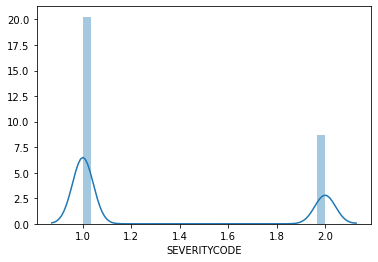

In [59]:
sns.distplot(pre_data['SEVERITYCODE'])

We can see that the data is unbalanced and skewed towards SEVERITYCODE = 1 (Property Damage Only Collision). We will upsample the minority class (SEVERITYCODE = 2  (Injury Collision)) later during training to reinforce its signal.

## 5. Preparing the Data for Training

First, we need to encode categorical features WEATHER, ROADCOND, and LIGHTCOND into numerical values using one-hot encoding technique. We'll use get_dummies function from pandas package for this.

In [60]:
weather_dummy = pd.get_dummies(pre_data['WEATHER']).drop('Other', axis = 1)
roadcond_dummy = pd.get_dummies(pre_data['ROADCOND']).drop('Other', axis = 1)
lightcond_dummy = pd.get_dummies(pre_data['LIGHTCOND']).drop('Other', axis = 1)

In [61]:
pre_data = pd.concat([pre_data, weather_dummy, roadcond_dummy, lightcond_dummy], axis = 1)
pre_data.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,...,Snowing,Dry,Oil,Sand/Mud/Dirt,Snow/Ice,Wet,Dark,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,2,11,0,0,Overcast,Wet,Daylight,...,0,0,0,0,0,1,0,0,1,0
1,1,-122.347294,47.647172,2,16,0,0,Raining,Wet,Dark,...,0,0,0,0,0,1,1,0,0,0
2,1,-122.334540,47.607871,4,14,0,0,Overcast,Dry,Daylight,...,0,1,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3,11,0,0,Clear,Dry,Daylight,...,0,1,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,2,11,0,0,Raining,Wet,Daylight,...,0,0,0,0,0,1,0,0,1,0


We'll Drop WEATHER, ROADCOND, and LIGHTCOND since we already have generated the dummy features from them.

In [62]:
pre_data.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1, inplace = True)
pre_data.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,SPEEDING,ST_COLCODE,SEGLANEKEY,...,Snowing,Dry,Oil,Sand/Mud/Dirt,Snow/Ice,Wet,Dark,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,2,11,0,0,0,10,0,...,0,0,0,0,0,1,0,0,1,0
1,1,-122.347294,47.647172,2,16,0,0,0,11,0,...,0,0,0,0,0,1,1,0,0,0
2,1,-122.334540,47.607871,4,14,0,0,0,32,0,...,0,1,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3,11,0,0,0,23,0,...,0,1,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,2,11,0,0,0,10,0,...,0,0,0,0,0,1,0,0,1,0


Now we'll split the data into training dataset and test dataset using test_train_split function.

In [63]:
X = pre_data.loc[:,'PERSONCOUNT':]
y = pre_data['SEVERITYCODE']

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
print('X_train.shape() = ', X_train.shape, ', y_train.shape() = ', y_train.shape)
print('X_test.shape()  = ', X_test.shape, ', y_test.shape()  = ', y_test.shape)

X_train.shape() =  (127145, 27) , y_train.shape() =  (127145,)
X_test.shape()  =  (62624, 27) , y_test.shape()  =  (62624,)


Since the data is skewed toward, SEVERITYCODE = 1, we will upsample the data for SEVERITYCODE = 2. We will do this for our training dataset.

First we will need to recombine X_train and y_train using pd.concat.

In [66]:

X_train = pd.concat([X_train, y_train], axis = 1)
X_train.head()

,PERSONCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,...,Dry,Oil,Sand/Mud/Dirt,Snow/Ice,Wet,Dark,Dawn,Daylight,Dusk,SEVERITYCODE
84861,2,14,0,0,0,14,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2
65009,2,14,1,0,0,14,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
35770,3,14,0,0,0,13,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
157502,5,14,0,0,0,16,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2
58028,2,14,0,0,0,14,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [67]:
print('SEVERITYCODE 1 = ',X_train[X_train['SEVERITYCODE'] == 1]['SEVERITYCODE'].count())
print('SEVERITYCODE 2 = ',X_train[X_train['SEVERITYCODE'] == 2]['SEVERITYCODE'].count())

SEVERITYCODE 1 =  88973
SEVERITYCODE 2 =  38172


Then we will upsample the data for SEVERITYCODE 2 using resample function from sklearn.

In [68]:
from sklearn.utils import resample

X_1 = X_train[X_train['SEVERITYCODE'] == 1]
X_2 = X_train[X_train['SEVERITYCODE'] == 2]

X_2_upsample = resample(X_2, replace=True, n_samples=len(X_1), random_state=42)
len(X_2_upsample)

88973

Next we combine X_1 and X_2_upsample.

In [69]:
X_train_upsample = pd.concat([X_1, X_2_upsample], axis = 0)
len(X_train_upsample)

177946

And split it again into X_train and y_train.

In [70]:
y_train_upsample = X_train_upsample['SEVERITYCODE']
X_train_upsample.drop('SEVERITYCODE', axis = 1, inplace = True)

In [71]:
y_train_upsample

65009     1
35770     1
58028     1
89940     1
146391    1
         ..
164192    2
154717    2
120267    2
128709    2
131314    2
Name: SEVERITYCODE, Length: 177946, dtype: int64

In [72]:
X_train_upsample

,PERSONCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,...,Snowing,Dry,Oil,Sand/Mud/Dirt,Snow/Ice,Wet,Dark,Dawn,Daylight,Dusk
65009,2,14,1,0,0,14,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
35770,3,14,0,0,0,13,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
58028,2,14,0,0,0,14,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
89940,4,16,1,0,0,32,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
146391,2,11,0,0,0,11,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164192,2,11,0,0,0,10,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
154717,2,11,1,0,0,10,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
120267,3,11,0,1,0,10,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
128709,1,28,1,0,0,50,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


#### Logistic Regression


In [73]:
from sklearn.linear_model import LogisticRegression

mod_log_r = LogisticRegression()
mod_log_r.fit(X_train_upsample, y_train_upsample)
yhat_log_r = mod_log_r.predict(X_test)
yhat_log_r_proba = mod_log_r.predict_proba(X_test)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat_log_r))

Logistic Regression&#39;s Accuracy:  0.6025166070516096


#### SVM

from sklearn import svm

mod_svm = svm.SVC(kernel='rbf', gamma = 'scale')
mod_svm = mod_svm.fit(X_train_upsample, y_train_upsample)
yhat_svm = mod_svm.predict(X_test)
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train_upsample, y_train_upsample)
yhat_tree = tree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Decision Trees&#39;s Accuracy:  0.7177919008686765


K's Nearest Neighbor

In [75]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1,Ks):

    mod_neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_upsample,y_train_upsample)
    yhat_neigh = mod_neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_neigh)
    std_acc[n-1] = np.std(yhat_neigh == y_test) / np.sqrt(yhat_neigh.shape[0])

mean_acc

array([0.72572816, 0.72507345, 0.73007154, 0.7309977 , 0.73257856,
       0.73430314, 0.73376022, 0.73530915, 0.73529318, 0.73696985,
       0.73612353, 0.73760858, 0.7367463 , 0.73858265, 0.73794392,
       0.73939704, 0.73939704, 0.74053079, 0.73942897])

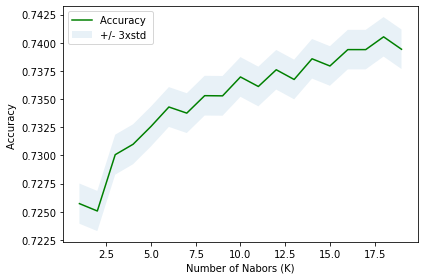

In [76]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [77]:
print('The best k for KNN is ',np.argmax(mean_acc)+1, 'with an accuracy of ',mean_acc[np.argmax(mean_acc)])

The best k for KNN is  18 with an accuracy of  0.7405307869187532


In [83]:
mod_neigh = KNeighborsClassifier(n_neighbors = np.argmax(mean_acc)+1).fit(X_train_upsample,y_train_upsample)
yhat_neigh = mod_neigh.predict(X_test)
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

KNN&#39;s Accuracy:  0.7177919008686765


In [79]:
## Collecting the Metrics

In [87]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

report = pd.DataFrame(index = ['KNN', 'Decision Tree', 'LogisticRegression'], columns = ['Jaccard', 'F1-score'])

report.loc['KNN', 'Jaccard'] = jaccard_score(y_test, yhat_neigh)
report.loc['KNN', 'F1-score'] = f1_score(y_test, yhat_neigh, average = 'weighted')

report.loc['Decision Tree', 'Jaccard'] = jaccard_score(y_test, yhat_tree)
report.loc['Decision Tree', 'F1-score'] = f1_score(y_test, yhat_tree, average = 'weighted')

report.loc['LogisticRegression', 'Jaccard'] = jaccard_score(y_test, yhat_log_r)
report.loc['LogisticRegression', 'F1-score'] = f1_score(y_test, yhat_log_r, average = 'weighted')

report.index.name = 'Algorithm'
report

,Jaccard,F1-score
Algorithm,,
KNN,0.720592,0.691338
Decision Tree,0.660069,0.719763
LogisticRegression,0.49144,0.617977
